In [1]:
import w_risk_kit as wrk
import pandas as pd

import yfinance as yf

## 1. Data Curation

In [2]:
securityId = yf.Ticker('GOOGL')
securityShortName = securityId.get_info()['shortName']

In [3]:
securities = 'MMM AOS ABT ABBV ABMD ACN ATVI ADM ADBE ADP AAP AES AFL A AIG APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AMT AWK AMP ABC AME AMGN APH ADI ANSS ANTM AON APA AAPL AMAT APTV ANET AJG AIZ T ATO ADSK AZO AVB AVY BKR BLL BAC BBWI BAX BDX BRK.B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF.B CHRW CDNS CZR CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CERN CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CTXS CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DISCA DISCK DISH DG DLTR D DPZ DOV DOW DTE DUK DRE DD DXC EMN ETN EBAY ECL EIX EW EA EMR ENPH ETR EOG EPAM EFX EQIX EQR ESS EL ETSY RE EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FAST FRT FDX FITB FRC FE FIS FISV FLT FMC F FTNT FTV FBHS FOXA FOX BEN FCX GRMN IT GE GNRC GD GIS GPC GILD GL GPN GM GS GWW HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST HWM HPQ HUM HBAN HII IEX IDXX INFO ITW ILMN INCY IR INTC ICE IBM IP IPG IFF INTU ISRG IVZ IPGP IQV IRM JKHY J JBHT SJM JNJ JCI JPM JNPR K KEY KEYS KMB KIM KMI KLAC KHC KR LHX LH LRCX LW LVS LDOS LEN LLY LNC LIN LYV LKQ LMT L LOW LUMN LYB MTB MRO MPC MKTX MAR MMC MLM MAS MA MTCH MKC MCD MCK MDT MRK FB MET MTD MGM MCHP MU MSFT MAA MRNA MHK TAP MDLZ MPWR MNST MCO MS MOS MSI MSCI NDAQ NTAP NFLX NWL NEM NWSA NWS NEE NLSN NKE NI NSC NTRS NOC NLOK NCLH NRG NUE NVDA NVR NXPI ORLY OXY ODFL OMC OKE ORCL OGN OTIS PCAR PKG PH PAYX PAYC PYPL PENN PNR PBCT PEP PKI PFE PM PSX PNW PXD PNC POOL PPG PPL PFG PG PGR PLD PRU PEG PTC PSA PHM PVH QRVO PWR QCOM DGX RL RJF RTX O REG REGN RF RSG RMD RHI ROK ROL ROP ROST RCL SPGI CRM SBAC SLB STX SEE SRE NOW SHW SBNY SPG SWKS SNA SEDG SO LUV SWK SBUX STT STE SYK SIVB SYF SNPS SYY TMUS TROW TTWO TPR TGT TEL TDY TFX TER TSLA TXN TXT TMO TJX TSCO TT TDG TRV TRMB TFC TWTR TYL TSN UDR ULTA USB UAA UA UNP UAL UNH UPS URI UHS VLO VTR VRSN VRSK VZ VRTX VFC VIAC VTRS V VNO VMC WRB WAB WMT WBA DIS WM WAT WEC WFC WELL WST WDC WRK WY WHR WMB WTW WYNN XEL XLNX XYL YUM ZBRA ZBH ZION ZTS'
securitiesId = yf.Tickers(securities)

In [4]:
securityPrices = pd.DataFrame(securityId.history(start='2015-12-31', end='2022-12-31')['Close'].rename(securityShortName))
securityPrices

,Alphabet Inc.
Date,
2015-12-31,778.010010
2016-01-04,759.440002
2016-01-05,761.530029
2016-01-06,759.330017
2016-01-07,741.000000
...,...
2022-02-28,2701.139893
2022-03-01,2681.229980
2022-03-02,2691.429932


In [5]:
securitiesData = yf.download(securities, start='2015-12-31', end='2022-12-31')
securitiesPrices = securitiesData['Close']
securitiesPrices = securitiesPrices.dropna(axis=1)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


## 2. Feature Creation

In [6]:
securityDailyReturns = securityPrices.pct_change().dropna()
securityMonthlyReturns = (securityDailyReturns+1).groupby(pd.Grouper(freq='M')).prod()-1

In [7]:
securitiesDailyReturns = securitiesPrices.dropna(axis=1).pct_change().dropna()
securitiesMonthlyReturns = (securitiesDailyReturns+1).groupby(pd.Grouper(freq='M')).prod()-1

In [8]:
wrk.std_distr_analysis(securityMonthlyReturns,12,0.02)

,Alphabet Inc.
Annualized Return,0.215765
Annualized Volatility,0.218001
Skewness,-0.029533
Kurtosis,2.517448
Is Normal,True
Sharpe Ratio,0.881764
Gaussian VaR (95%),0.084478
Cornish-Fisher VaR (95%),0.08561
Monthly Historic VaR (95%),0.076454
Monthly Historic CVaR (95%),0.101654


In [9]:
wrk.std_distr_analysis(securitiesMonthlyReturns,12,0.02)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Annualized Return,0.204689,-0.156758,0.052003,0.339029,0.160954,0.057745,0.22054,0.172481,0.192575,0.285837,...,0.026082,0.115889,0.012205,-0.023131,0.145366,0.139417,0.030862,0.319637,0.149995,0.253648
Annualized Volatility,0.226113,0.419166,0.333073,0.285523,0.273931,0.239465,0.404674,0.205427,0.223868,0.249085,...,0.489895,0.168899,0.28693,0.259031,0.238278,0.237082,0.26886,0.391892,0.326774,0.201683
Skewness,-0.178162,-0.089721,0.220872,-0.215334,0.172751,-0.174019,-0.160937,0.001205,-0.246272,-0.21184,...,0.156443,-0.134583,0.055296,0.030528,-0.705885,0.040098,-0.455157,0.528335,-0.508777,-0.613898
Kurtosis,2.7194,3.253049,4.438221,2.66552,3.74189,2.892887,3.346962,3.35079,3.134948,2.651242,...,4.369358,2.59985,4.772788,3.767371,3.165764,6.247151,4.206662,3.275983,4.461647,4.079105
Is Normal,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,True
Sharpe Ratio,0.801995,-0.414362,0.094076,1.097188,0.505108,0.154587,0.486309,0.728804,0.756888,1.047996,...,0.011757,0.557406,-0.026917,-0.163716,0.516486,0.49446,0.039435,0.750617,0.390366,1.137627
Gaussian VaR (95%),0.088917,0.204319,0.14832,0.106719,0.113646,0.105882,0.16733,0.081824,0.088745,0.09378,...,0.218901,0.069313,0.13091,0.121343,0.098619,0.098578,0.121211,0.155464,0.137866,0.074421
Cornish-Fisher VaR (95%),0.092529,0.206753,0.139464,0.112212,0.108569,0.109388,0.171769,0.081387,0.092991,0.098523,...,0.208708,0.071541,0.126669,0.119547,0.11146,0.093346,0.129009,0.137372,0.148198,0.082844
Monthly Historic VaR (95%),0.086909,0.181786,0.126435,0.116728,0.112426,0.122089,0.178407,0.070668,0.099043,0.092202,...,0.18399,0.068634,0.13483,0.123415,0.114325,0.076161,0.120359,0.136352,0.124761,0.083284
Monthly Historic CVaR (95%),0.118735,0.263532,0.194787,0.142084,0.151102,0.143417,0.231282,0.109926,0.129045,0.127237,...,0.27595,0.086283,0.179127,0.164854,0.153515,0.147564,0.186819,0.167959,0.197264,0.122074


<AxesSubplot:xlabel='Date'>

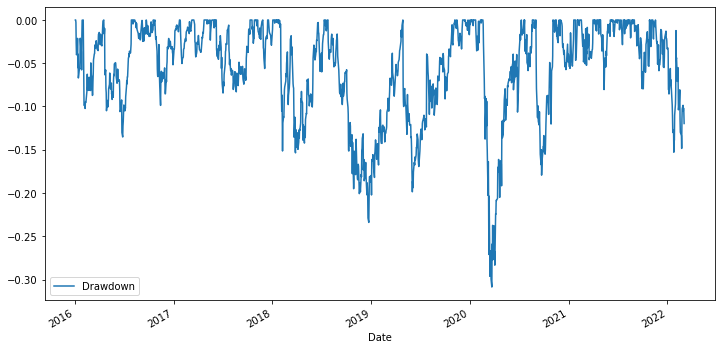

In [10]:
wrk.drawdown(securityDailyReturns[securityShortName])[['Drawdown']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

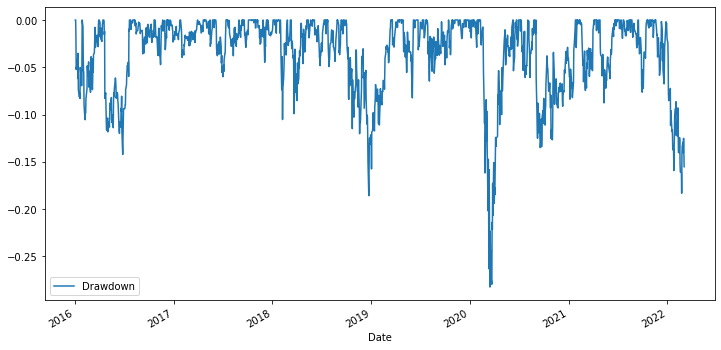

In [11]:
wrk.drawdown(securitiesDailyReturns['MSFT'])[['Drawdown']].plot(figsize=(12,6))

## 3. Strategy Analysis

<AxesSubplot:title={'center':'Moving Averages'}, xlabel='Date'>

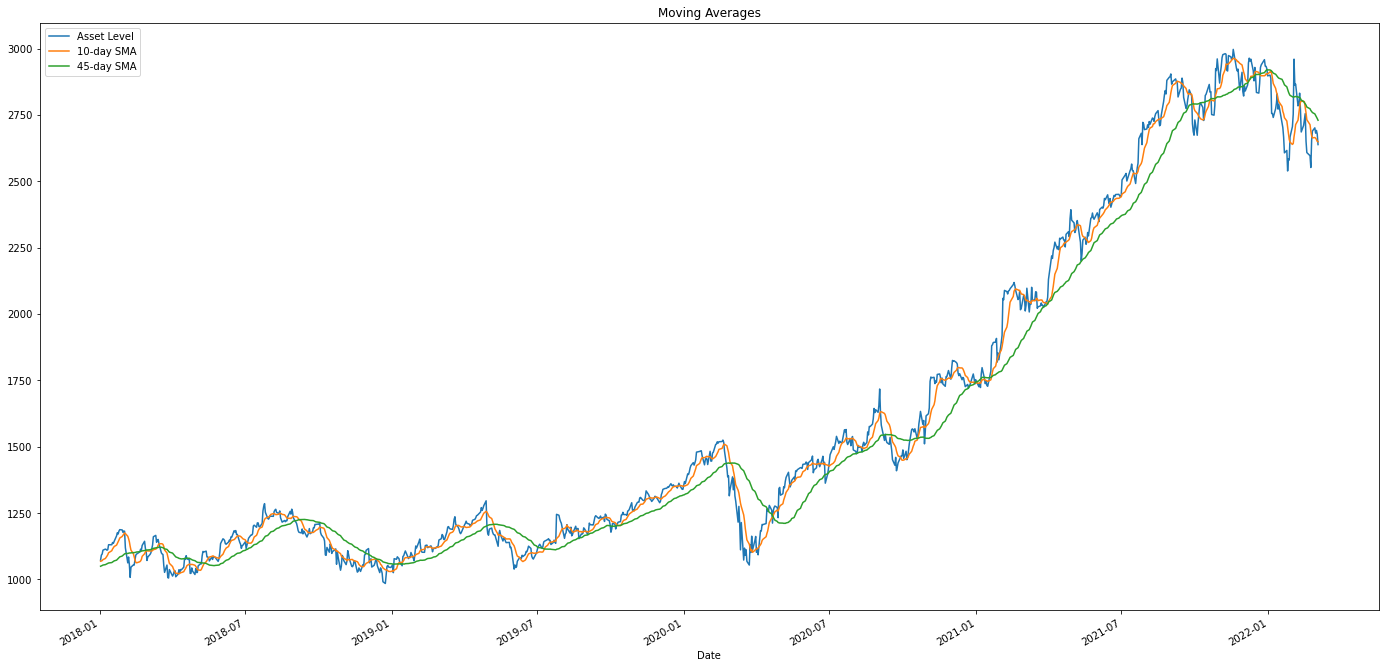

In [12]:
trendAnalysis = wrk.trend_info(securitiesPrices['GOOGL'])
trendAnalysis[['Asset Level','10-day SMA','45-day SMA']]['2018':].plot(figsize=(24,12),title="Moving Averages")

<AxesSubplot:title={'center':'Trade Signal (-1:Short, 1:Long)'}, xlabel='Date'>

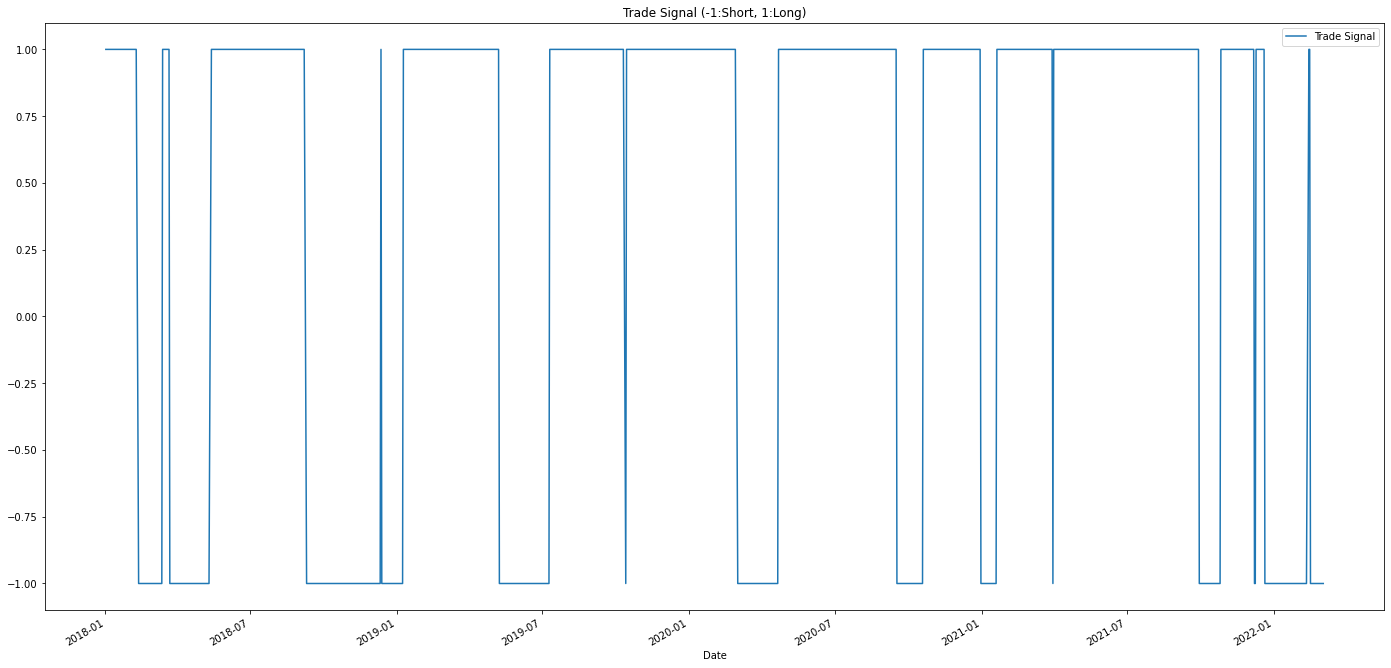

In [13]:
trendAnalysis[['Trade Signal']]['2018':].plot(figsize=(24,12),title="Trade Signal (-1:Short, 1:Long)")

## 4. Backtesting

In [14]:
trendStratMthReturns = wrk.calc_mth_returns(securitiesPrices.aggregate(lambda col: wrk.trend_info(col)['Strategy Returns']))
trendAssetMthReturns = wrk.calc_mth_returns(securitiesPrices.aggregate(lambda col: wrk.trend_info(col)['Asset Returns']))

In [15]:
wrk.std_distr_analysis(trendStratMthReturns,12,0.02)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Annualized Return,0.102324,-0.126013,0.1112,0.174473,0.072546,-0.039636,0.106993,-0.009882,0.026047,0.200847,...,-0.194438,-0.023777,0.1347,0.042592,0.136288,0.045837,0.000232,0.091627,0.147045,0.145807
Annualized Volatility,0.210582,0.345646,0.288215,0.269973,0.270858,0.265009,0.306393,0.199325,0.199735,0.22713,...,0.379096,0.187169,0.236855,0.257549,0.250197,0.187986,0.273207,0.354644,0.315443,0.212385
Skewness,-0.038693,-0.075613,0.633937,0.260939,-0.065787,-0.283282,0.270285,-0.234745,-0.366326,-0.215183,...,0.419202,-0.282633,0.827001,0.274038,0.343195,0.243329,0.770976,0.315645,1.028667,0.192
Kurtosis,3.756089,2.432285,3.733539,3.287326,4.584204,3.531683,3.43388,3.300394,3.606907,3.342307,...,4.601773,3.390186,4.759295,3.579019,7.707857,3.784593,4.359153,4.02091,6.283038,4.481466
Is Normal,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,False,True,False,True,False,True
Sharpe Ratio,0.383743,-0.415047,0.310519,0.561706,0.190278,-0.221192,0.278572,-0.147381,0.029559,0.781787,...,-0.555644,-0.229826,0.475394,0.085932,0.45624,0.134818,-0.071259,0.198044,0.395281,0.581562
Gaussian VaR (95%),0.08936,0.169184,0.123832,0.11092,0.118869,0.12541,0.132223,0.093193,0.090403,0.08965,...,0.190734,0.088828,0.098923,0.115306,0.104771,0.08349,0.125882,0.154864,0.133433,0.086944
Cornish-Fisher VaR (95%),0.089101,0.17244,0.107091,0.104629,0.117832,0.1306,0.124582,0.096601,0.095521,0.093127,...,0.173906,0.092637,0.079672,0.108585,0.090796,0.078848,0.105688,0.143454,0.099191,0.081757
Monthly Historic VaR (95%),0.092682,0.175277,0.118044,0.095955,0.12483,0.129335,0.111528,0.100267,0.098684,0.089367,...,0.165539,0.080561,0.079039,0.111327,0.11299,0.080083,0.110009,0.141707,0.117037,0.081029
Monthly Historic CVaR (95%),0.123019,0.202042,0.140025,0.136716,0.176249,0.17152,0.153191,0.128311,0.133391,0.131039,...,0.239825,0.11949,0.116729,0.151946,0.166872,0.104888,0.135079,0.19066,0.1454,0.124297


In [16]:
secMthRets = wrk.calc_mth_returns(securitiesPrices.aggregate(lambda col: wrk.trend_info(col)['Asset Returns']))
secMthStratRets = wrk.calc_mth_returns(securitiesPrices.aggregate(lambda col: wrk.trend_info(col)['Strategy Returns']))

medianMthRetsStats = pd.concat([(wrk.std_distr_analysis(secMthStratRets,12, 0.01).T.drop(['Is Normal',
                                                                                     'Maximum Date',
                                                                                     'Minimum Date',
                                                                                     'Max Drawdown Period End'],
                                                                                     axis=1)).median(),
                       wrk.std_distr_analysis(secMthRets,12, 0.01).T.drop(['Is Normal',
                                                                                'Maximum Date',
                                                                                'Minimum Date',
                                                                                'Max Drawdown Period End'],
                                                                                axis=1).median()],
                      axis = 1)
medianMthRetsStats.columns = ['Trend Strategy Returns','Raw Security Returns']
medianMthRetsStats

,Trend Strategy Returns,Raw Security Returns
Annualized Return,0.028083,0.116245
Annualized Volatility,0.241867,0.262226
Skewness,0.154406,-0.088097
Kurtosis,4.026207,3.978134
Sharpe Ratio,0.079310,0.406483
Gaussian VaR (95%),0.110301,0.110842
Cornish-Fisher VaR (95%),0.102566,0.110398
Monthly Historic VaR (95%),0.103410,0.105745
Monthly Historic CVaR (95%),0.139708,0.151397
Maximum,0.209133,0.219815


## 5. Portfolio Construction

In [17]:
erStrat = wrk.annualize_rets(secMthStratRets,12)
covStrat = secMthStratRets.cov()
wgtsStrat = wrk.msr(0.01,erStrat,covStrat)
OptwgtsStrat = pd.DataFrame(wgtsStrat.round(4),
                            index=erStrat.index,
                            columns = ['Optimal Strategy Portfolio'])
optPortStratMthRet = wrk.calc_mth_returns(pd.DataFrame(secMthStratRets @ wgtsStrat,
                                                      columns=['Optimal Strategy Portfolio']))

erRaw = wrk.annualize_rets(secMthRets,12)
covRaw = secMthRets.cov()
wgtsRaw = wrk.msr(0.01,erRaw,covRaw)
OptwgtsRaw = pd.DataFrame(wgtsRaw.round(4),
                          index=erRaw.index,
                          columns = ['Optimal Raw Securities Portfolio'])
optPortRawMthRet = wrk.calc_mth_returns(pd.DataFrame(secMthRets @ wgtsRaw,
                                                      columns=['Optimal Raw Securities Portfolio']))

optPortWgt = pd.concat([OptwgtsStrat,OptwgtsRaw],axis=1)
optPortMthRet = pd.concat([optPortStratMthRet,optPortRawMthRet],axis=1)

In [18]:
wrk.std_distr_analysis(optPortMthRet,12,0.01)

,Optimal Strategy Portfolio,Optimal Raw Securities Portfolio
Annualized Return,0.171595,0.322028
Annualized Volatility,0.02766,0.101247
Skewness,-0.48439,-0.078505
Kurtosis,3.105333,3.214339
Is Normal,True,True
Sharpe Ratio,5.789424,3.054139
Gaussian VaR (95%),-0.000269,0.023808
Cornish-Fisher VaR (95%),0.000772,0.024327
Monthly Historic VaR (95%),-0.0,0.021695
Monthly Historic CVaR (95%),0.003333,0.038927


<AxesSubplot:>

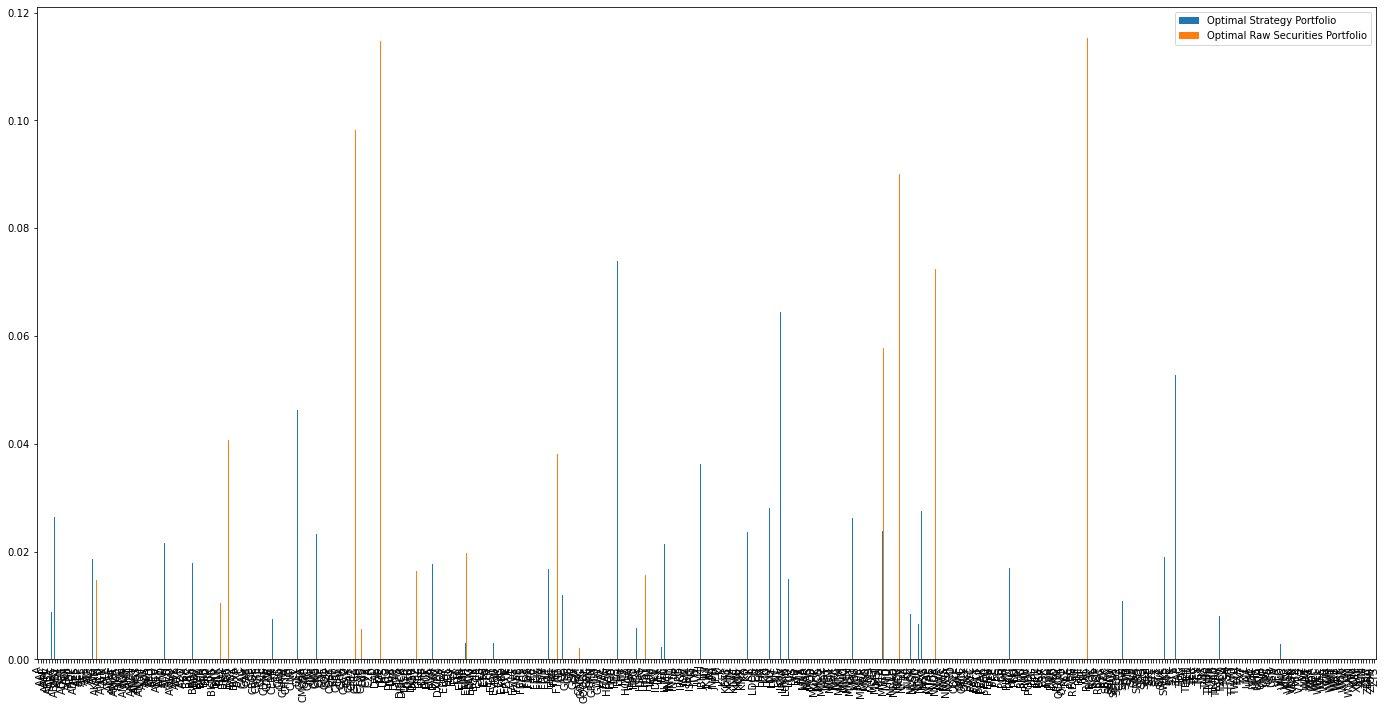

In [19]:
optPortWgt.plot.bar(figsize=(24,12))

array([[<AxesSubplot:title={'center':'Optimal Strategy Portfolio'}>,
        <AxesSubplot:title={'center':'Optimal Raw Securities Portfolio'}>]],
      dtype=object)

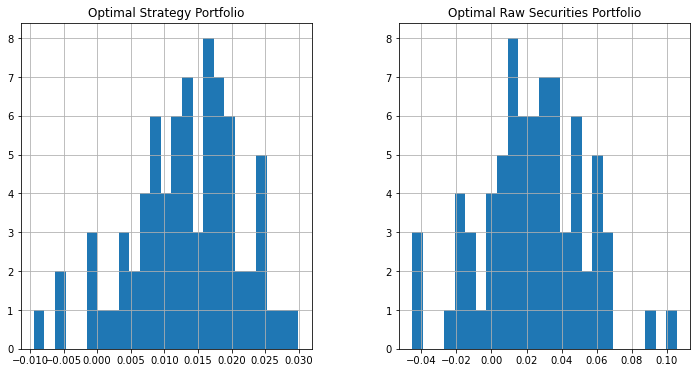

In [20]:
optPortMthRet.hist(bins=25, figsize=(12,6))

In [35]:
securitiesData.columns.levels[0]

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')